In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset: https://ec.europa.eu/eurostat/databrowser/view/ds-045409__custom_16496269/default/table?lang=en

In [55]:
imports = pd.read_csv('data/estat_ds-045409_filtered_en .csv')

In [56]:
imports.index = imports.reporter
imports.drop(columns=['reporter', 'STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Frequency',
       'flow', 'FLOW', 'indicators', 'INDICATORS', 'TIME_PERIOD', 'partner', 'PARTNER',
       'TIME_PERIOD.1', 'Observation Value'], inplace=True)

In [57]:
imports.columns = ['country', 'product_id','product_name', 'value']
imports

,country,product_id,product_name,value
reporter,,,,
AT,Austria,201,"Meat of bovine animals, fresh or chilled",166322603
AT,Austria,204,"Meat of sheep or goats, fresh, chilled or frozen",11339466
AT,Austria,207,Meat and edible offal of fowls of the species ...,267542908
AT,Austria,306,"Crustaceans, whether in shell or not, live, fr...",35962536
AT,Austria,803,"Bananas, incl. plantains, fresh or dried",110407182
...,...,...,...,...
SK,Slovakia,7502,Unwrought nickel,1544907
SK,Slovakia,7601,Unwrought aluminium,241672958
SK,Slovakia,7801,Unwrought lead :,2216998


In [58]:
# pivot table rows as countries and columns as products
imports_p = imports.pivot_table(index='country', columns='product_id', values='value', aggfunc=np.sum)
# fill NaN with 0
imports_p.fillna(0, inplace=True)

# columns_to_drop = [2709]

# imports_p.drop(columns=columns_to_drop, inplace=True)

/tmp/ipykernel_94430/27764945.py:2: FutureWarning: The provided callable <function sum at 0x7ff77830e170> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  imports_p = imports.pivot_table(index='country', columns='product_id', values='value', aggfunc=np.sum)


In [59]:
# import pandas as pd
# import numpy as np

# # ------------------------------------------------------------------
# # 0 · INPUTS
# # ------------------------------------------------------------------
# energy_ids = [27112100, 271111, 2701, 2709]
# food_ids   = [1001, 1005, 1006, 1007, 1511, 1514,
#               15121990, 15131999, 1201,
#               207, 201, 204, 803, 80510, 1701]
# fert_ids   = [310530, 310420, 310210, 2510]
# metals_ids = [7601, 7502, 7901, 7801, 8001, 7403,
#               2601, 7106, 7108, 7110]

# groups = {'energy': energy_ids,
#           'food'  : food_ids,
#           'fert'  : fert_ids,
#           'metals': metals_ids}

# # ------------------------------------------------------------------
# # 1 · BUILD GROUP‑NORMALISED SHARES   (rows = country, cols = HS6)
# # ------------------------------------------------------------------
# use_ids      = sum(groups.values(), [])        # flat list of HS6 codes
# imports_val  = imports_p[use_ids].copy()     # raw values (not yet shares)

# shares_inc = pd.DataFrame(index=imports_val.index,
#                           columns=imports_val.columns,
#                           dtype=float)

# for g, id_list in groups.items():
#     gsum = imports_val[id_list].sum(axis=1)             # Series (country totals)
#     shares_inc[id_list] = imports_val[id_list].div(
#                               gsum.replace(0, np.nan),   # avoid divide‑by‑zero
#                               axis=0)

# shares_inc = shares_inc.fillna(0.0)                      # countries w/ no group imports

# # ------------------------------------------------------------------
# # 2 · RESCALE SO EVERY ROW SUMS TO 4
# # ------------------------------------------------------------------
# row_sum = shares_inc.sum(axis=1)                         # Σ_k s_ik  (≤ 4)
# shares_scaled = shares_inc.mul(4 / row_sum, axis=0)

# # sanity check
# assert np.allclose(shares_scaled.sum(axis=1), 4, atol=1e-10)


In [60]:
# normalize the data so that each row sums to 1
imports_p = imports_p.div(imports_p.sum(axis=1), axis=0)
imports_p.head(3)

product_id,201,204,207,306,803,1001,1003,1005,1006,1007,...,310530,9011100,9012100,9021000,9024000,12024200,15121990,15131999,23012000,27112100
country,,,,,,,,,,,,,,,,,,,,,
Austria,0.011016,0.000751,0.017721,0.002382,0.007313,0.017310,0.002577,0.017555,0.003080,0.000053,...,0.001250,0.002120,0.022832,0.000349,0.000133,0.000380,0.006321,0.001053,0.000564,0.000000
Belgium,0.005780,0.003293,0.011236,0.010380,0.017925,0.020884,0.008508,0.009645,0.007501,0.000224,...,0.001944,0.017526,0.006715,0.000496,0.000167,0.000714,0.005513,0.001060,0.000172,0.283644
Bulgaria,0.002196,0.000768,0.020509,0.003749,0.009159,0.003204,0.000173,0.012694,0.004555,0.000077,...,0.007004,0.011807,0.011305,0.000147,0.000020,0.002996,0.004146,0.000391,0.000318,0.274138


In [61]:

C = imports_p.sum(axis=1).iloc[0]        # should be 4 for every row
avg_shares = imports_p.mean(axis=0) / C
H = (avg_shares**2).sum()
N_eff = 1 / H


print(f"Herfindahl index : {H:0.4f}")
print(f"Effective shocks : {N_eff:0.1f}")


Herfindahl index : 0.1264
Effective shocks : 7.9


In [62]:
imports_p.to_csv('data/hs6_imports.csv')

# Bartik

In [63]:
shocks = {15121990: 67.25081991598961,
 2701: 59.45163747143947,
 7502: 51.74937598969376,
 27112100: 50.00693833891724,
 1001: 37.365245101362795,
 310530: 34.13737882124167,
 2709: 33.93311089927312,
 1507: 33.16094613353658,
 1511: 32.136616125937884,
 207: 29.414880294659305,
 310420: 24.422438043353743,
 1005: 21.294794068254934,
 1201: 18.867737784962554,
 7601: 16.38034850531274,
 1514: 15.918643050135111,
 2601: 14.743831585301434,
 230400: 14.233888582879056,
 151329: 11.189139216409586,
 15131999: 10.618310236392299,
 7901: 10.087687614263412,
 7106: 9.30995768201053,
 7108: 7.2581799759914505,
 5201: 6.876183263915185,
 803: 6.4336885630862595,
 8001: 5.163632970183078,
 7110: 4.93989840567319,
 7403: 4.5853037207866345,
 1701: 4.555433589462135,
 201: 4.508780256288561,
 2510: 3.2461156356495144,
 310210: 3.086084264751058,
 271111: 2.898216726155981,
 2401: 1.7540505663623676,
 306: 1.1780495079033733,
 12024200: 0.7941603866040351,
 7801: 0.5570684220683251,
 204: 0.23244156549283415,
 180100: -0.33841839050645545,
 1006: -1.1709601873536302,
 4001: -1.8942161767185568,
 4407: -2.8394424367578828,
 4403: -3.127370816824157,
 4412: -3.1273708168258203,
 80510: -3.3411137041536927,
 9011100: -4.648074369189914,
 9012100: -8.674423257147277,
 9024000: -13.523944929072886}

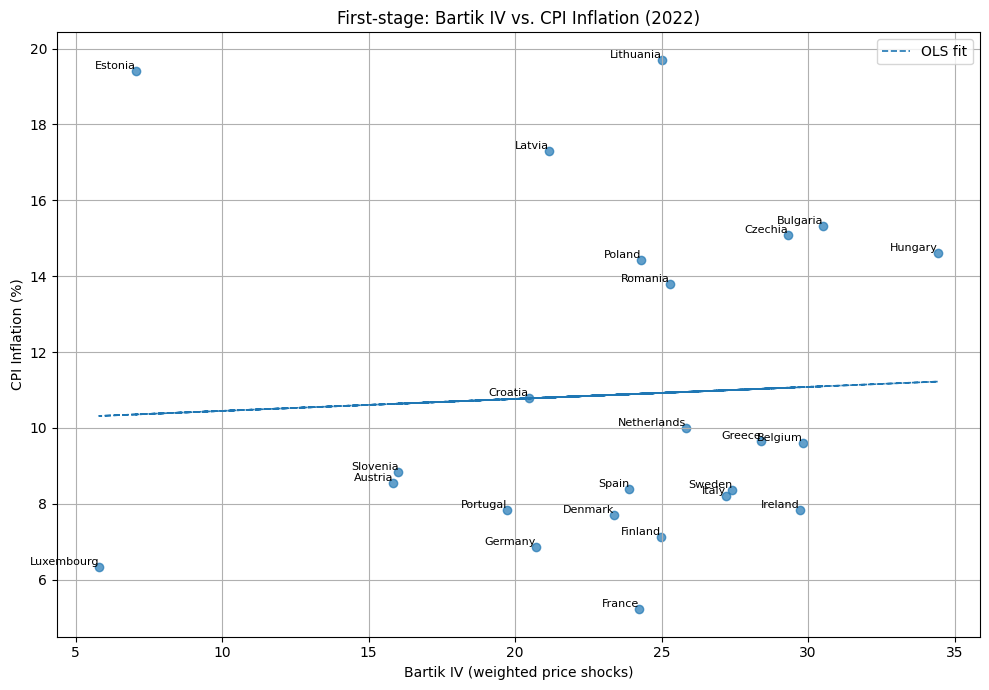

In [64]:
# ---------- 3. Compute Bartik IV ----------
common_cols = [col for col in shocks if col in imports_p.columns]
shocks_vector = pd.Series(shocks).reindex(common_cols)

# Compute Bartik IV: weighted sum of shares × global price shocks
imports_p['bartik_iv'] = imports_p[common_cols].dot(shocks_vector)

# ---------- 4. Prepare for merging with inflation data ----------
bartik = imports_p.reset_index()  # 'country' becomes a column again

# ---------- 5. Load World Bank inflation data ----------
wb = pd.read_csv('../Design/data/world_inflation.csv', skiprows=4)
wb_2022 = wb[['Country Name', 'Country Code', '2022']].rename(columns={'2022': 'inflation_2022'})

# ---------- 6. Merge and filter ----------
merged = bartik.merge(wb_2022, left_on='country', right_on='Country Name', how='left')
merged = merged.dropna(subset=['inflation_2022'])
merged['inflation_2022'] = pd.to_numeric(merged['inflation_2022'], errors='coerce')
merged = merged[merged['inflation_2022'] <= 30]

europe_or_nearby = [
    "Austria", "Belarus", "Belgium", "Bulgaria", "Croatia", "Czechia",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Ireland", "Italy", "Kazakhstan", "Latvia", "Lithuania",
    "Luxembourg", "Netherlands", "North Macedonia", "Norway", "Poland",
    "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom"
]

merged = merged[merged['country'].isin(europe_or_nearby)]

# ---------- 7. Plot: Bartik IV vs. CPI Inflation ----------
x = merged['bartik_iv'].values
y = merged['inflation_2022'].values
names = merged['country'].values

# Fit OLS regression
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.7)

# Annotate each point with country name
for i, name in enumerate(names):
    plt.text(x[i], y[i], name, fontsize=8, ha='right', va='bottom')

# Plot regression line
plt.plot(x, m * x + b, linestyle='--', linewidth=1.2, label='OLS fit')

plt.title("First-stage: Bartik IV vs. CPI Inflation (2022)")
plt.xlabel("Bartik IV (weighted price shocks)")
plt.ylabel("CPI Inflation (%)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare data for regression
reg_df = merged[['inflation_2022', 'bartik_iv']].dropna()
X = sm.add_constant(reg_df['bartik_iv'])  # adds intercept term
y = reg_df['inflation_2022']

# Fit OLS model (first-stage)
model = sm.OLS(y, X).fit()

# Print regression summary and F-statistic
print(model.summary())
print(f"\nFirst-stage F-statistic: {model.fvalue:.2f}, p-value: {model.f_pvalue:.4f}")


                            OLS Regression Results                            
Dep. Variable:         inflation_2022   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.05846
Date:                Sat, 03 May 2025   Prob (F-statistic):              0.811
Time:                        22:14:24   Log-Likelihood:                -68.056
No. Observations:                  24   AIC:                             140.1
Df Residuals:                      22   BIC:                             142.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1343      3.179      3.188      0.0

In [66]:
# --- 1. HAND‑CODE THE GROUP A MAPPING --------------------------------------
energy_ids = ['27112100', '271111', '2701', '2709']          # gas, LNG, coal, crude
food_ids   = ['1001', '1005', '1006', '1007', '1511', '1514',
              '15121990', '151329', '15131999', '1201',      # cereals & oils
              '207', '201', '204', '803', '80510', '1701']   # meats & fruit & sugar
fert_ids   = ['310530', '310420', '310210', '2510']          # DAP, KCl, Urea, rock P
metals_ids = ['7601', '7502', '7901', '7801', '8001', '7403', '2601',
              '7106', '7108', '7110']                        # Al, Ni, Zn, Pb, Sn, Cu, Fe, Ag, Au, Pt

groups = {pid: 'energy'   for pid in energy_ids} | \
         {pid: 'food'     for pid in food_ids}   | \
         {pid: 'fert'     for pid in fert_ids}   | \
         {pid: 'metals'   for pid in metals_ids}
